# Linear Regression

In [99]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Load housing data

In [136]:
# Read data into pandas dataframe from CSV (comma separated value) file
train_df = pd.read_csv("data/california_housing_train.csv")
test_df = pd.read_csv("data/california_housing_test.csv")

df = pd.concat([train_df, test_df]).sample(frac=1) # Shuffle dataset by sampling without replacement.
msk = np.random.rand(len(df)) < 0.8 # Create mask with 80/20 train/test split
train_df = df[msk]
test_df = df[~msk]
train_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10989    -120.93     37.74                37.0       1956.0           402.0   
938      -118.39     34.23                18.0       3405.0           831.0   
14682    -122.18     37.76                37.0       1575.0           358.0   
8169     -118.43     33.98                19.0       8324.0          1590.0   
962      -117.09     32.75                20.0       1701.0           503.0   
...          ...       ...                 ...          ...             ...   
15617    -122.36     40.62                11.0       3896.0           886.0   
2695     -117.68     33.60                19.0       3913.0           460.0   
11750    -121.31     37.96                52.0       1829.0           301.0   
16794    -123.11     39.32                20.0       2745.0           504.0   
10755    -120.66     35.50                19.0       1861.0           364.0   

       population  households  median_income  median_house_value  
10989      1265.0       397.0         2.3023             91900.0  
938        3001.0       795.0         3.0083            181900.0  
14682       933.0       320.0         2.2917            107000.0  
8169       2927.0      1538.0         7.5426            351700.0  
962        1482.0       465.0         1.6789             95500.0  
...           ...         ...            ...                 ...  
15617      1902.0       843.0         2.2905             94200.0  
2695       1646.0       454.0         7.2147            303900.0  
11750       694.0       319.0         3.3466             92600.0  
16794      1421.0       430.0         3.3431            137500.0  
10755      1040.0       363.0         3.3125            163900.0  

[16044 rows x 9 columns]

In [169]:
# Use only 50 datapoints and housing_median_age feature for regression task (To make the visualization easier)
NUM_RECORDS_TRAIN = train_df.shape[0] # 50
NUM_RECORDS_TEST = test_df.shape[0] # 50

X_train = train_df.iloc[:NUM_RECORDS_TRAIN, 2].to_numpy()
X_test  = test_df.iloc[:NUM_RECORDS_TEST, 2].to_numpy()

y_train = train_df.iloc[:NUM_RECORDS_TRAIN, -1].to_numpy()
y_test  = test_df.iloc[:NUM_RECORDS_TEST, -1].to_numpy()

## Direct Implementation

### Data pre-processing

In [170]:
# Mean centering and variance normalization
X_train_mean = X_train.mean()
X_train_std = np.std(X_train)
X_train_norm = (X_train - X_train_mean)/X_train_std

# Apply normalization to test data as well
X_test_norm = (X_test - X_train_mean)/X_train_std

In [171]:
# Make vectors into matrices
print(X_train_norm.shape)
print(y_train.shape)
X_train_norm_mat = np.expand_dims(X_train_norm, axis=1)
X_test_norm_mat = np.expand_dims(X_test_norm, axis=1)
y_train_mat = np.expand_dims(y_train, axis=1)
y_test_mat = np.expand_dims(y_test, axis=1)
print(X_train_norm_mat.shape)
print(y_train_mat.shape)

(16044,)
(16044,)
(16044, 1)
(16044, 1)


In [172]:
# Add bias (y-intercept) term to data 
X_train_norm_mat_bias = np.append(X_train_norm_mat, np.ones((NUM_RECORDS_TRAIN,1)), axis=1)
X_train_norm_mat_bias.shape

(16044, 2)

In [173]:
X_T_X = np.matmul(X_train_norm_mat_bias.T,X_train_norm_mat_bias)
X_T_X_inv = np.linalg.inv(X_T_X)
X_T_X_inv_X_T = np.matmul(X_T_X_inv, X_train_norm_mat_bias.T)
w = X_T_X_inv_X_T_t = np.matmul(X_T_X_inv_X_T, y_train_mat)

In [174]:
w, w.shape

(array([[ 11652.80503212],
        [206353.03128896]]),
 (2, 1))

In [177]:
X_test_norm_mat_bias = np.append(X_test_norm_mat, np.ones((NUM_RECORDS_TEST,1)), axis=1)
y_test_pred = np.matmul(X_test_norm_mat_bias, w)

In [179]:
mse = np.mean(np.square(y_test_pred - y_test_mat))
mse

13385353571.354347

In [180]:
y_train_pred = np.matmul(X_train_norm_mat_bias, w)

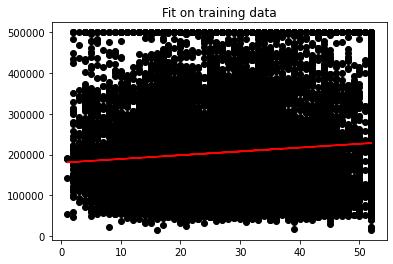

In [181]:
plt.title("Fit on training data")
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, y_train_pred, color='red');

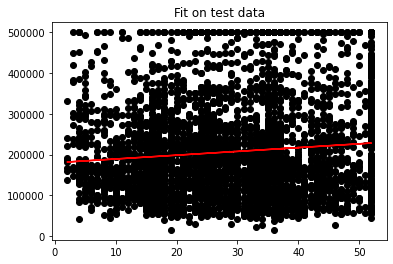

In [184]:
plt.title("Fit on test data")
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_test_pred, color="red");

## Linear Regression using scikit-learn

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [186]:
# Convert to matrix format
X_train_mat = np.expand_dims(X_train, axis=1)
X_test_mat = np.expand_dims(X_test, axis=1)

In [187]:
# sklearn function for mean centering and unit variance
sc = StandardScaler()
sc.fit(X_train_mat)
X_train_norm_mat = sc.transform(X_train_mat)
X_test_norm_mar = sc.transform(X_test_mat)

In [188]:
model = LinearRegression() # Define Model
model.fit(X_train_norm_mat, y_train) # Fit model to training data
y_test_pred = model.predict(X_test_norm_mat) # predict on test data
y_train_pred = model.predict(X_train_norm_mat) # predict on training data

In [189]:
model.coef_, model.intercept_

(array([11652.80503212]), 206353.03128895536)

In [190]:
mse = mean_squared_error(y_test, y_test_pred)
mse

13385353571.354347

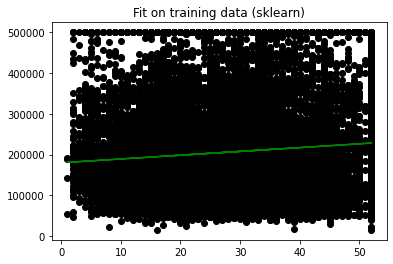

In [193]:
plt.title("Fit on training data (sklearn)")
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, y_train_pred, color="green");

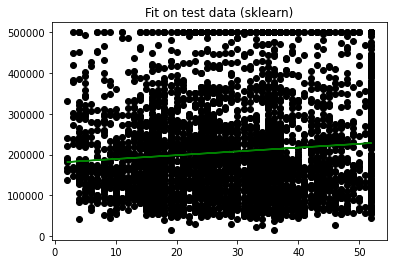

In [194]:
plt.title("Fit on test data (sklearn)")
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_test_pred, color='green');

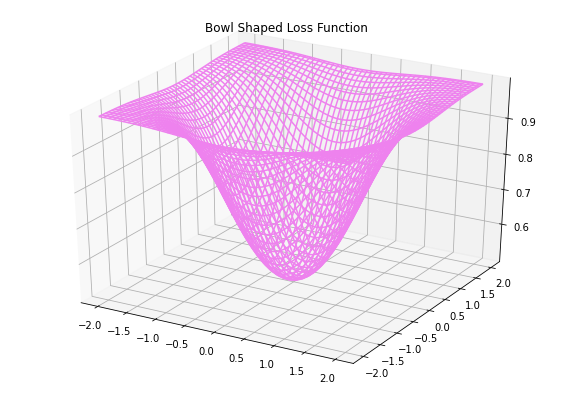

In [206]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(10, 7), 
                        subplot_kw={'projection': '3d'})

alpha = 2
r = np.linspace(-alpha,alpha,100)
X,Y= np.meshgrid(r,r)
l = 1./(1+np.exp(-(X**2+Y**2)))

ax1.plot_wireframe(X,Y,l, color='violet')
ax1.set_title("Bowl Shaped Loss Function")

plt.show()